# Week 2 – Task 2: Movie Recommendation using Unsupervised Learning

In this task, we apply K-Means Clustering to group similar movies based on their average ratings, number of ratings, and genres. This is an unsupervised learning task aimed at discovering patterns in movie preferences.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [16]:
# Load movie and rating data
movies = pd.read_csv("movie.csv")
ratings = pd.read_csv("rating.csv")

# Preview data
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
# Merge ratings with movies on movieId
df = pd.merge(ratings, movies, on='movieId')

# Calculate average rating and number of ratings per movie
movie_stats = df.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['avg_rating', 'rating_count']
movie_stats = movie_stats.reset_index()

# Join movie stats with movie info
movie_features = pd.merge(movie_stats, movies[['movieId', 'title', 'genres']], on='movieId')
movie_features.head()


,movieId,avg_rating,rating_count,title,genres
0,1,3.921240,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.211977,22243,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.151040,12735,Grumpier Old Men (1995),Comedy|Romance
3,4,2.861393,2756,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.064592,12161,Father of the Bride Part II (1995),Comedy


In [18]:
# One-hot encode genres
genres = movie_features['genres'].str.get_dummies(sep='|')
movie_features = pd.concat([movie_features, genres], axis=1)

# Drop unneeded columns
movie_features.drop(columns=['genres', 'title', 'movieId'], inplace=True)
movie_features.head()


,avg_rating,rating_count,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3.921240,49695,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.211977,22243,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.151040,12735,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2.861393,2756,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.064592,12161,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(movie_features)


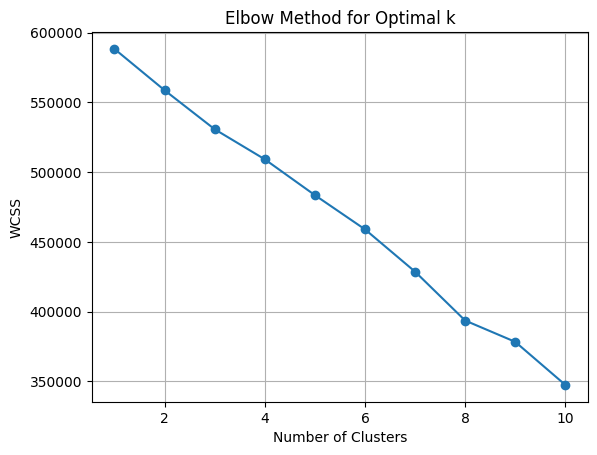

In [20]:
# Find optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [21]:
# Train final KMeans with k=5 (adjust if needed)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)


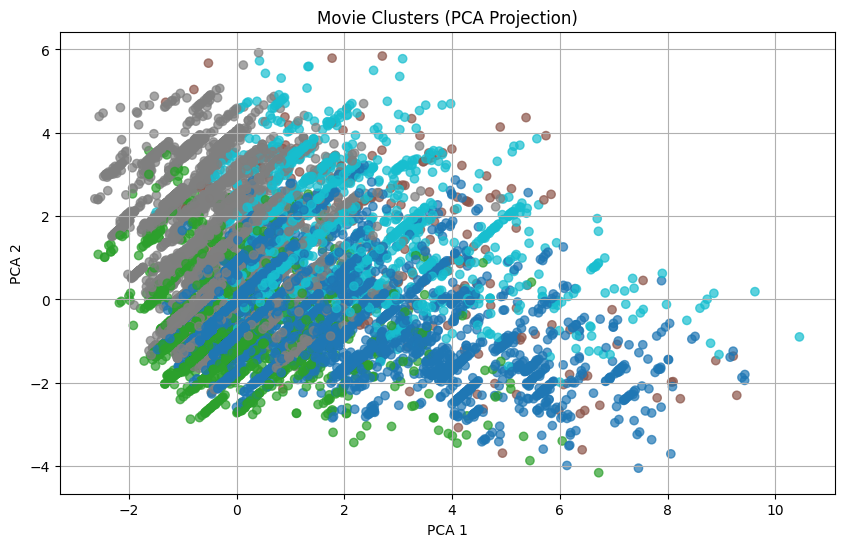

In [22]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='tab10', alpha=0.7)
plt.title("Movie Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


## Summary

In this task, I implemented a K-Means Clustering model to segment movies based on viewer preferences and genres.
I processed the MovieLens dataset to compute average ratings, count of ratings, and one-hot encoded genres.
Using the elbow method, I selected an optimal number of clusters and visualized the results with PCA.
The clustering revealed meaningful groupings of movies that can be used for recommendation systems based on similar preferences.
